## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

**Q1.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [2]:
# load data
import pandas as pd
import numpy as np

df = pd.read_csv('USA_cars_datasets.csv')
df = df[['price', 'year', 'mileage']]
print(df.shape)
df.head(20)

(2499, 3)


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654
5,5700,2018,45561
6,7300,2010,149050
7,13350,2017,23525
8,14600,2018,9371
9,5250,2017,63418


In [3]:
df.describe()

,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


There are no NAs to handle as the count in all three variables are equivalent to the total number of rows in the table.

In [4]:
# maxmin normalize year and mileage
df['year'] = (df['year'] - min(df['year']))/(max(df['year']) - min(df['year']))
df['mileage'] = (df['mileage'] - min(df['mileage']))/(max(df['mileage']) - min(df['mileage']))

In [5]:
# splitting sample into 80% for training and 20% for evaluation
from sklearn.model_selection import train_test_split
y = df['price']
X = df.drop('price', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

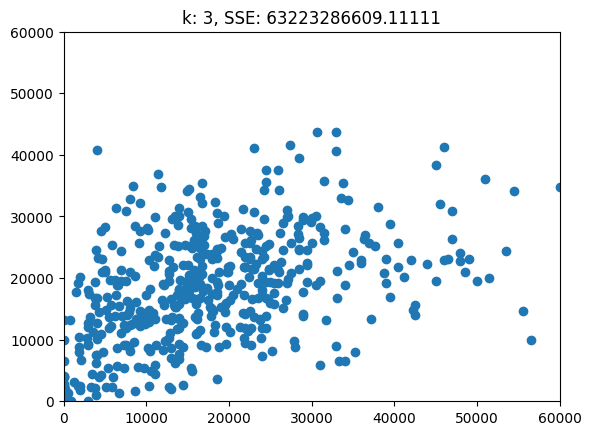

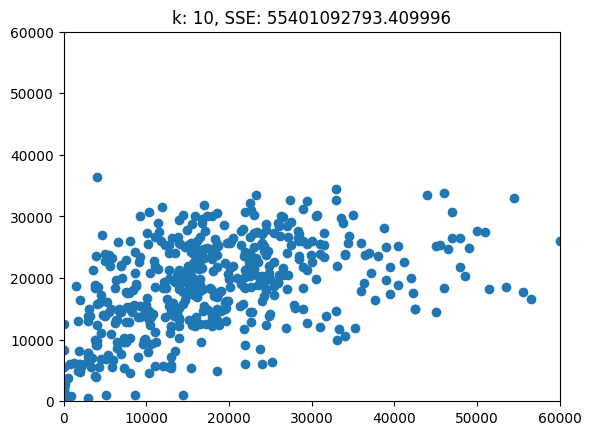

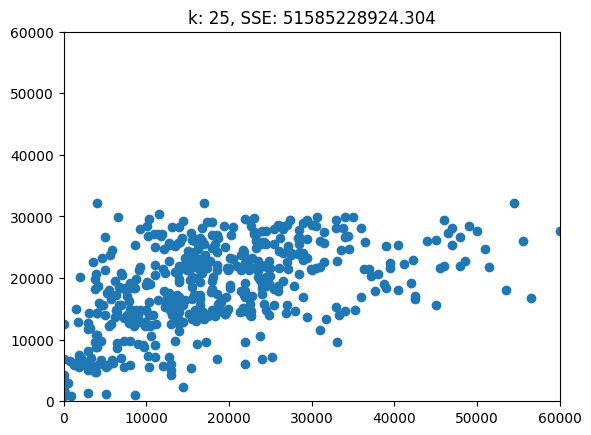

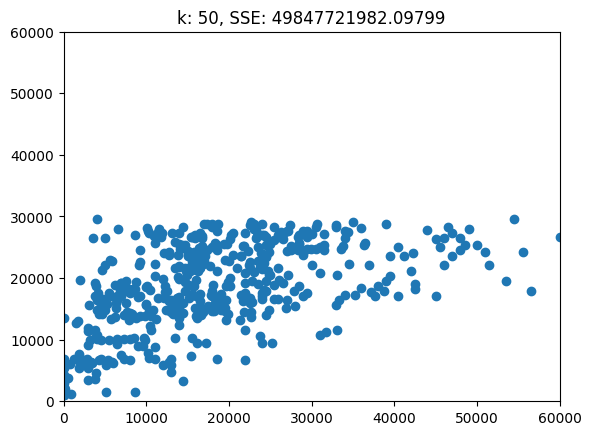

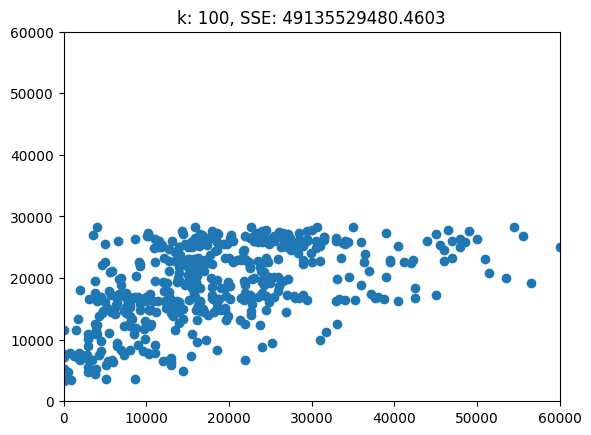

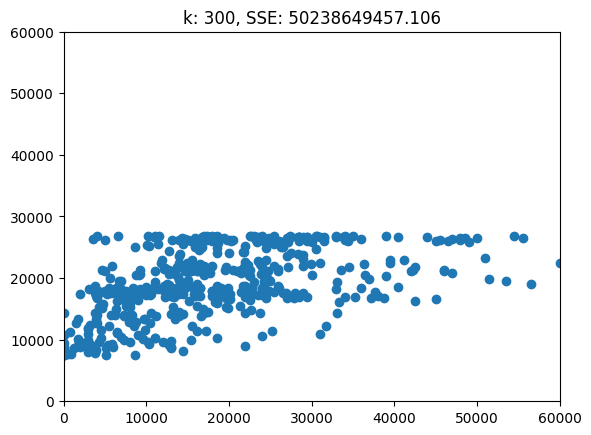

In [6]:
# Use knn algorithm to predict price using year and mileage for test set
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

for k in [3,10,25,50,100,300]:
    model = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_hat = model.predict(X_test)
    SSE = np.sum( (y_test-y_hat)**2 )
    #
    plot, axes = plt.subplots()
    plt.scatter(y_test,y_hat)
    plt.title('k: '+str(k)+', SSE: '+str(SSE))
    axes.set_ylim(0, 60000)
    axes.set_xlim(0, 60000)
    plt.show()

After looking at the several plots, I noticed for the most part as k increases, the sse decreases.

[77]


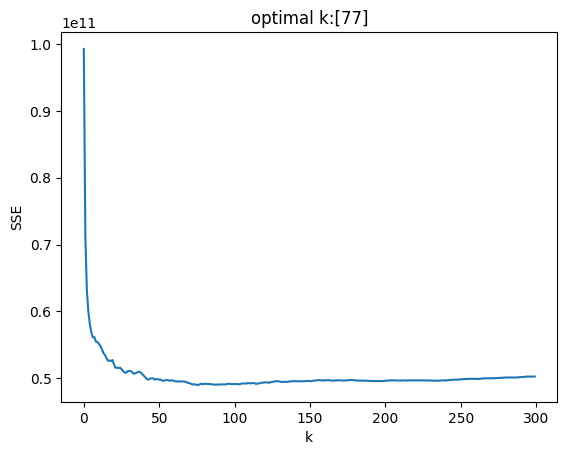

In [7]:
# Determine the optimal k:
threshold = 300
k_grid = np.arange(1, threshold)
SSE = np.zeros(threshold)

for k in range(threshold):
    fitted_model = KNeighborsRegressor(n_neighbors = k+1).fit(X_train,y_train)
    # Predict value
    y_hat = fitted_model.predict(X_test)
    # Compute sse
    SSE[k] = np.sum((y_test - y_hat)**2)

# compute what was lowest SSE value
SSE_min = np.min(SSE)
min_index = np.where(SSE == SSE_min)
k_optimal = k_grid[min_index]
print(k_optimal)

plt.plot(np.arange(0, threshold), SSE) # Plot SSE by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_optimal))
plt.ylabel('SSE')
plt.show()

The optimal k was found to be 77. From the plot, it can be shown that for k = 300, the model is probably overfitting, and for 3, 10, and 25, the model is underfitting. At k = 300, it is shown that there is a lot of horizontal bunching in the data as well.

**Q2.** This question is a case study for $k$ nearest neighbor. The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

In [9]:
# load the data
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
print(df.shape)
df.head(20)

(299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [10]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


There are no NAs to handle since the count of all variables match the total amount of records in the table.

In [11]:
# remove time from dataframe
df.drop('time', axis=1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


In [12]:
# Create correlation matrix
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


The variables with the strongest correlation with a death event are age, serum_creatinine, and ejection_fraction.

In [13]:
# summary table death event grouped by variables: anaemia, diabetes, high_blood_pressure, sex, and smoking
print(df[['anaemia','DEATH_EVENT']].groupby('anaemia').describe())
print(df[['diabetes','DEATH_EVENT']].groupby('diabetes').describe())
print(df[['high_blood_pressure','DEATH_EVENT']].groupby('high_blood_pressure').describe())
print(df[['sex','DEATH_EVENT']].groupby('sex').describe())
print(df[['smoking','DEATH_EVENT']].groupby('smoking').describe())

        DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
anaemia                                                         
0             170.0  0.294118  0.456991  0.0  0.0  0.0  1.0  1.0
1             129.0  0.356589  0.480859  0.0  0.0  0.0  1.0  1.0
         DEATH_EVENT                                             
               count      mean       std  min  25%  50%  75%  max
diabetes                                                         
0              174.0  0.321839  0.468530  0.0  0.0  0.0  1.0  1.0
1              125.0  0.320000  0.468353  0.0  0.0  0.0  1.0  1.0
                    DEATH_EVENT                                             
                          count      mean       std  min  25%  50%  75%  max
high_blood_pressure                                                         
0                         194.0  0.293814  0.456687  0.0  0.0  0.0  1.0  1.0
1                         105.0  0.37

The variables for which a higher proportion of the population dies when the variable takes 1 instead of 0 would be high_blood_pressure and anaemia. With high blood pressure the mean goes up by 0.08 when high blood pressure is 1 compared to 0. With anaemia, the mean goes up by 0.06 when anaemia is 1 compared to 0.

In [14]:
# build matrix with all variables that are most correlated with DEATH_EVENT
X = df[['age', 'ejection_fraction', 'serum_creatinine', 'high_blood_pressure', 'anaemia']]
y = df['DEATH_EVENT']

In [15]:
# maxmin normalize all variables in X
def maxmin(x):
    u = (x - min(x)) / (max(x) - min(x))
    return u

X = X.apply(maxmin)

In [16]:
np.random.seed(100)
N = X.shape[0]
all = np.arange(1,N)
train = np.random.choice(N,int(.8*N) ) # Generate random indices for training set
test = [item for item in all if item not in train] # Find test indices

#test = np.where( train not in np.linspace(1,N) )
X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

[6]


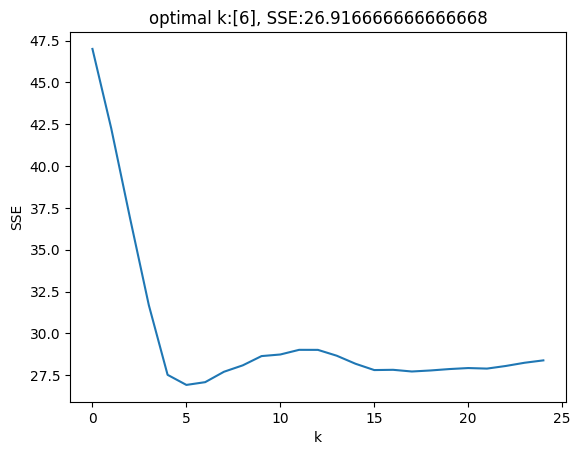

In [17]:
from sklearn.neighbors import KNeighborsRegressor

# Determine the optimal k:
k_bar = 25
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar)

for k in range(k_bar):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    predictor = knn.fit(X_train,y_train)
    y_hat = knn.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Bug in sklearn requires .values

SSE_min = np.min(SSE) # highest recorded accuracy
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),SSE) # Plot accuracy by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star)+', SSE:'+str(SSE_min))
plt.ylabel('SSE')
plt.show()

[83]


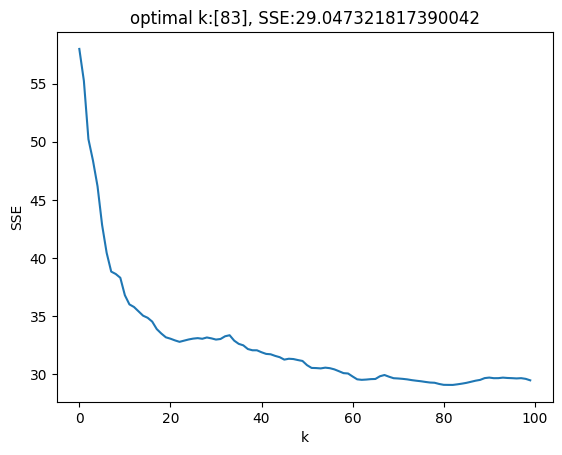

In [18]:
X = df.drop('DEATH_EVENT',axis=1)

X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

from sklearn.neighbors import KNeighborsRegressor

# Determine the optimal k:
k_bar = 100
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar)

for k in range(k_bar):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    predictor = knn.fit(X_train,y_train)
    y_hat = knn.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Bug in sklearn requires .values

SSE_min = np.min(SSE) # highest recorded accuracy
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index] # Find the optimal value of k
print(k_star)

plt.plot(np.arange(0,k_bar),SSE) # Plot accuracy by k
plt.xlabel("k")
plt.title("optimal k:"+str(k_star)+', SSE:'+str(SSE_min))
plt.ylabel('SSE')
plt.show()

**Q3.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)